In [2]:
import pandas as pd
import numpy as np
import re
from functions import *
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, ENGLISH_STOP_WORDS
import nltk
from nltk.corpus import gutenberg, stopwords
from nltk.collocations import *
from nltk import FreqDist
from nltk import word_tokenize
import spacy

## Load DataFrame

In [2]:
df = pd.read_csv('df99.csv', index_col = 0)

In [3]:
df.reset_index(drop = True, inplace = True)

In [4]:
df = df[['artist', 'lyrics', 'clean_lyrics', 'better_lyrics', 'cleaned_lemmed_lyrics', 'genre']]
df.shape

(348834, 6)

## Clean up lyrics and lemmatize

In [4]:
# clean lyrics column (get rid of punctuation, lowercase, and line breaks)
#found in functions.py 
cleanText(df, 'lyrics', 'clean_lyrics')

In [4]:
# load spacy
nlp = spacy.load('en_core_web_md')

In [6]:
# use spacy lemmatizer to lemmatize clean_lyrics column
df['cleaned_lemmed_lyrics'] = df["clean_lyrics"].apply(lambda row: " ".join([w.lemma_ for w in nlp(row)]))

In [13]:
# save lemmatized dataframe
df.to_csv('lemmed_data.csv')

In [2]:
# load lemmatized dataframe (to save from lemmatizing again)
df = pd.read_csv('lemmed_data.csv', index_col = 0)

In [3]:
df = df[['artist', 'lyrics', 'clean_lyrics', 'cleaned_lemmed_lyrics', 'genre']]
df.shape

(401817, 5)

In [9]:
df.head()

,artist,lyrics,clean_lyrics,better_lyrics,cleaned_lemmed_lyrics,genre
0,Ariana Grande,"I looked in my rearview mirror, (ah) and it s...",i looked in my rearview mirror ah and it seeme...,i looked in my rearview mirror ah and it seeme...,i look in -PRON- rearview mirror ah and -PRO...,Pop/R&B
1,Ariana Grande,"Baby, I got love for thee so deep inside of m...",baby i got love for thee so deep inside of me ...,baby i got love for thee so deep inside of me ...,baby i get love for thee so deep inside of -...,Pop/R&B
2,Ariana Grande,"(If you wanna party, if you, if you wanna par...",if you wanna party if you if you wanna party t...,if you wanna party if you if you wanna party \...,if -PRON- wanna party if -PRON- if -PRON- wa...,Pop/R&B
3,Ariana Grande,(Sha-la-la-la-la-la-la...) pritharto You don'...,sha la la la la la la you dont need a lot of m...,sha la la la la la la \n you dont need a lot o...,sha la la la la la la br -PRON- do not need ...,Pop/R&B
4,Ariana Grande,"Baby, don't you know you got all my love, all...",baby dont you know you got all my love all my ...,baby dont you know you got all my love all my ...,baby do not -PRON- know -PRON- get all -PRON...,Pop/R&B


## Split song into lines and get number of lines

In [6]:
# num_lines function in functions.py
df['lines'] = df['better_lyrics'].apply(num_lines)

In [8]:
# count the number of lines in each song
df['num_lines'] = df['lines'].apply(lambda x: len(x))

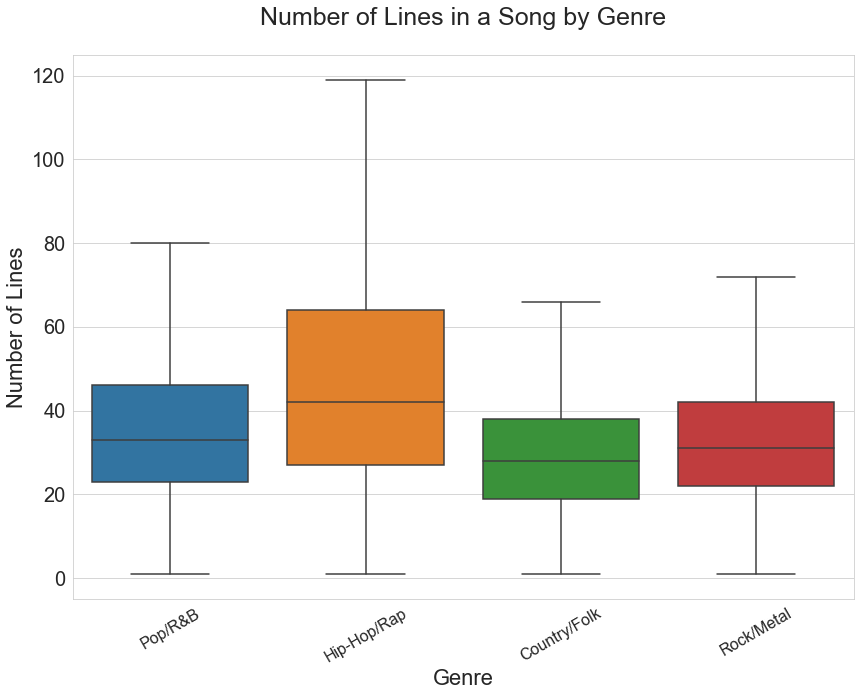

In [15]:
# Number of lines by genre
# set a style
sns.set_style('whitegrid')

fig = plt.figure(figsize=(14,10)) 
sns.boxplot(x="genre", y="num_lines", data=df, showfliers = False)

# graph attributes
plt.title('Number of Lines in a Song by Genre', fontsize=25, pad = 30)
plt.suptitle('')
plt.xlabel('Genre', fontsize=22)
plt.ylabel('Number of Lines', fontsize=22, labelpad=5)

# obtain x-tick labels and their locations
locs, labels = plt.xticks()

# plot the labels
plt.xticks(ticks=locs, labels=labels, rotation=30, fontsize=16)
plt.yticks(fontsize=20);

## Find number of words in song

In [12]:
df['num_words'] = df['lines'].apply(num_words)

In [13]:
df.head()

,artist,lyrics,clean_lyrics,better_lyrics,cleaned_lemmed_lyrics,genre,lines,num_lines,num_words
0,Ariana Grande,"I looked in my rearview mirror, (ah) and it s...",i looked in my rearview mirror ah and it seeme...,i looked in my rearview mirror ah and it seeme...,i look in -PRON- rearview mirror ah and -PRO...,Pop/R&B,[i looked in my rearview mirror ah and it seem...,44,462
1,Ariana Grande,"Baby, I got love for thee so deep inside of m...",baby i got love for thee so deep inside of me ...,baby i got love for thee so deep inside of me ...,baby i get love for thee so deep inside of -...,Pop/R&B,[baby i got love for thee so deep inside of me...,42,438
2,Ariana Grande,"(If you wanna party, if you, if you wanna par...",if you wanna party if you if you wanna party t...,if you wanna party if you if you wanna party \...,if -PRON- wanna party if -PRON- if -PRON- wa...,Pop/R&B,[if you wanna party if you if you wanna party ...,75,730
3,Ariana Grande,(Sha-la-la-la-la-la-la...) pritharto You don'...,sha la la la la la la you dont need a lot of m...,sha la la la la la la \n you dont need a lot o...,sha la la la la la la br -PRON- do not need ...,Pop/R&B,"[sha la la la la la la , you dont need a lot ...",21,212
4,Ariana Grande,"Baby, don't you know you got all my love, all...",baby dont you know you got all my love all my ...,baby dont you know you got all my love all my ...,baby do not -PRON- know -PRON- get all -PRON...,Pop/R&B,[baby dont you know you got all my love all my...,47,445


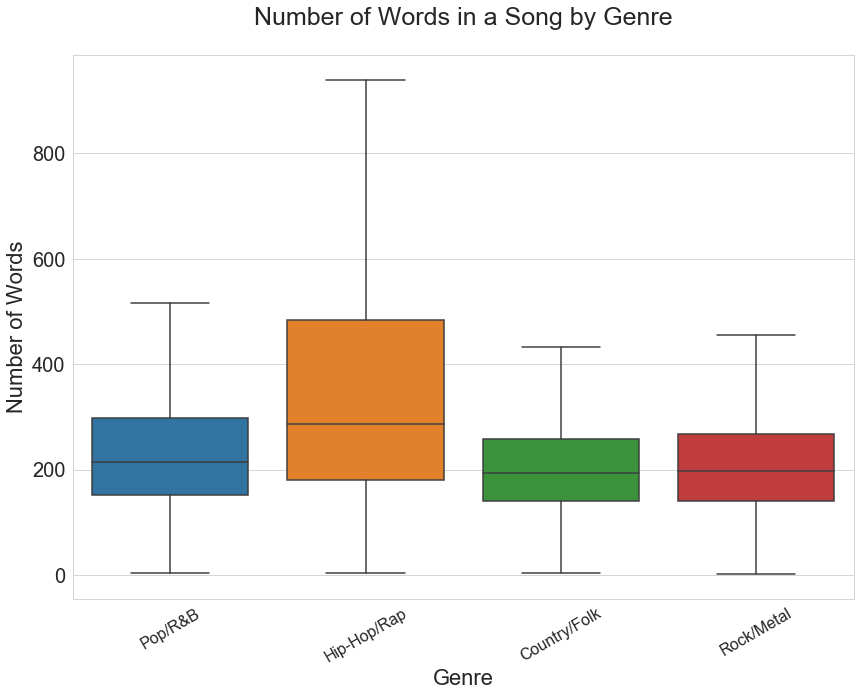

In [16]:
# Number of lines by genre
# set a style
sns.set_style('whitegrid')

fig = plt.figure(figsize=(14,10)) 
sns.boxplot(x="genre", y="num_words", data=df, showfliers = False)

# graph attributes
plt.title('Number of Words in a Song by Genre', fontsize=25, pad = 30)
plt.suptitle('')
plt.xlabel('Genre', fontsize=22)
plt.ylabel('Number of Words', fontsize=22, labelpad=5)

# obtain x-tick labels and their locations
locs, labels = plt.xticks()

# plot the labels
plt.xticks(ticks=locs, labels=labels, rotation=30, fontsize=16)
plt.yticks(fontsize=20);

## Find number of words per line

In [17]:
df['words_per_line'] = df['num_words']/df['num_lines']

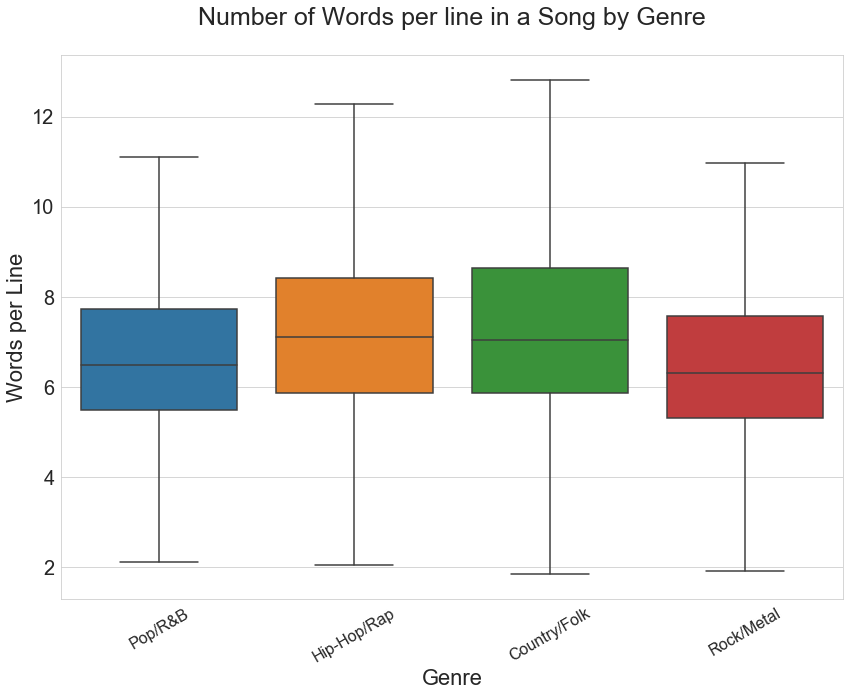

In [19]:
# Number of lines by genre
# set a style
sns.set_style('whitegrid')

fig = plt.figure(figsize=(14,10)) 
sns.boxplot(x="genre", y="words_per_line", data=df, showfliers = False)

# graph attributes
plt.title('Number of Words per line in a Song by Genre', fontsize=25, pad = 30)
plt.suptitle('')
plt.xlabel('Genre', fontsize=22)
plt.ylabel('Words per Line', fontsize=22, labelpad=5)

# obtain x-tick labels and their locations
locs, labels = plt.xticks()

# plot the labels
plt.xticks(ticks=locs, labels=labels, rotation=30, fontsize=16)
plt.yticks(fontsize=20);

## Find number of unique words in a song

In [20]:
df['unique_words'] = df['clean_lyrics'].apply(lambda x: len(set(x.split())))

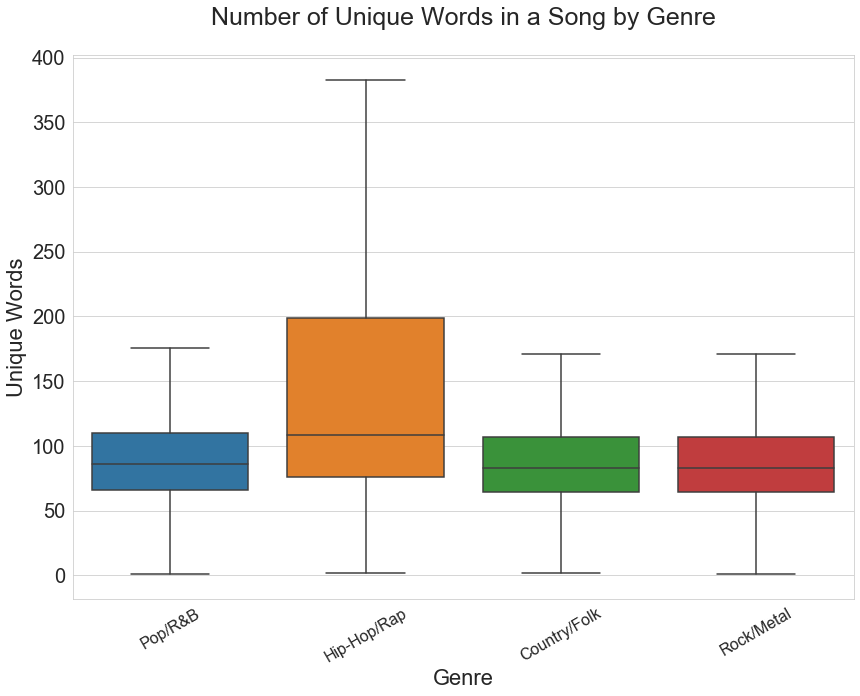

In [22]:
# Number of lines by genre
# set a style
sns.set_style('whitegrid')

fig = plt.figure(figsize=(14,10)) 
sns.boxplot(x="genre", y="unique_words", data=df, showfliers = False)

# graph attributes
plt.title('Number of Unique Words in a Song by Genre', fontsize=25, pad = 30)
plt.suptitle('')
plt.xlabel('Genre', fontsize=22)
plt.ylabel('Unique Words', fontsize=22, labelpad=5)

# obtain x-tick labels and their locations
locs, labels = plt.xticks()

# plot the labels
plt.xticks(ticks=locs, labels=labels, rotation=30, fontsize=16)
plt.yticks(fontsize=20);

## Find number of explicit words used

In [23]:
# profanity list taken from the following site that collected top explicit words in songs
# https://blog.musixmatch.com/profanity-in-lyrics-most-used-swear-words-and-their-usage-by-popular-genres-d8a12c776713
profanity_list = open('mxm_profanity_list.txt').readlines()
profanity_list = [word.strip('\n') for word in profanity_list]

In [34]:
df['explicit'] = df['clean_lyrics'].apply(lambda x: x.split(' '))

In [45]:
df['explicit'] = df['explicit'].apply(lambda x: sum(ele in profanity_list for ele in x))

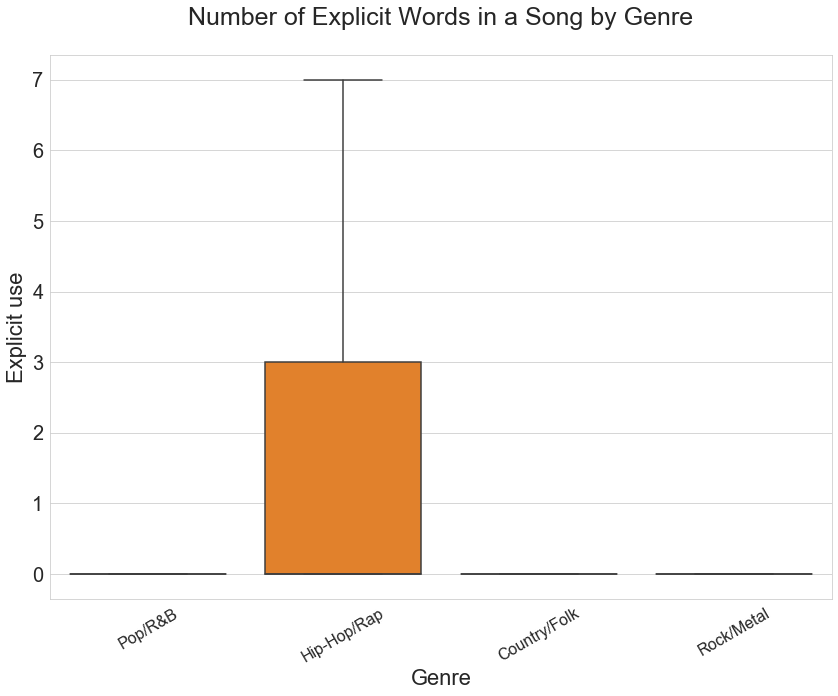

In [52]:
# Number of lines by genre
# set a style
sns.set_style('whitegrid')

fig = plt.figure(figsize=(14,10)) 
sns.boxplot(x="genre", y="explicit", data=df, showfliers = False)

# graph attributes
plt.title('Number of Explicit Words in a Song by Genre', fontsize=25, pad = 30)
plt.suptitle('')
plt.xlabel('Genre', fontsize=22)
plt.ylabel('Explicit use', fontsize=22, labelpad=5)

# obtain x-tick labels and their locations
locs, labels = plt.xticks()

# plot the labels
plt.xticks(ticks=locs, labels=labels, rotation=30, fontsize=16)
plt.yticks(fontsize=20);

In [53]:
# export dataframe for modeling/ngram analysis
df.to_csv('modeling_df.csv')

In [3]:
# import dataframe for ngram analysis (kernel kept dying)
df = pd.read_csv('modeling_df.csv', index_col = 0)

In [4]:
# create stopwords and update as spacy lemmatizer converts all pronouns (i, we, us, etc..) to -PRON-
stopwords_list = stopwords.words('english')+['pron', '-PRON-', 'br']

In [12]:
def top_ngrams(corpus, g):
    vec = CountVectorizer(ngram_range = (g, g), stop_words=stopwords_list).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis = 0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
    
    if g == 2:
        top_grams = top_bigrams_no_dups(words_freq)
    elif g == 3:
        top_grams = top_trigrams_no_dups(words_freq)
    else:
        top_grams = words_freq[0:20]
    return words_freq[:20]

In [14]:
def top_bigrams_no_dups(bigrams):
    top_bigrams = []
    for i in range(len(bigrams)):
        is_dup = bigrams[i][0].split()
        if is_dup[0]==is_dup[-1]:
            continue
        else:
            top_bigrams.append(bigrams[i])
            if len(top_bigrams) == 20:
                return top_bigrams   

In [15]:
def top_trigrams_no_dups(trigrams):
    top_trigrams = []
    for i in range(len(trigrams)):
        is_dup = trigrams[i][0].split()
        if (is_dup[0] == is_dup[-1]) or (is_dup[0] == is_dup[1]):
            continue
        else:
            top_trigrams.append(trigrams[i])
            if len(top_trigrams) == 20:
                return top_trigrams

In [7]:
# create genre df's for easier analysis 
pop_df = df[df['genre'] == 'Pop/R&B']
rock_df = df[df['genre'] == 'Rock/Metal']
rap_df = df[df['genre'] == 'Hip-Hop/Rap']
country_df = df[df['genre'] == 'Country/Folk']

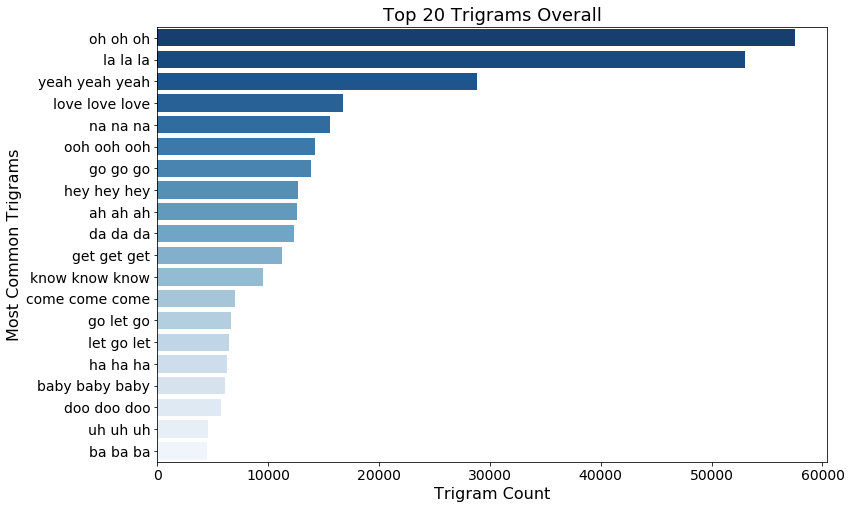

In [27]:
# this plot shows our original n-gram analysis. trying to pull out any context from the lyrics
# after unigrams was difficult as the most frequent phrases were groupings of the same words. 
# i needed to create a custom function to go through the most frequent groupings of words and
# eliminate any repetitive words. 


## Unigrams

In [13]:
# get top words for full df
unigram_full = pd.DataFrame(top_ngrams(df['cleaned_lemmed_lyrics'], 1), columns = ['Word','Count'])

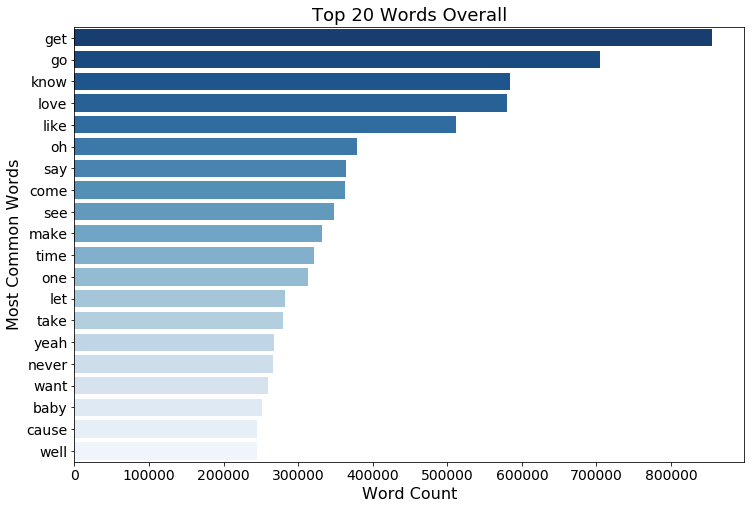

In [14]:
#bar plot for top 20 words
plt.figure(figsize=(12,8))
sns.barplot(unigram_full['Count'],unigram_full['Word'],palette='Blues_r')
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.title('Top 20 Words Overall',fontsize=18)
plt.ylabel('Most Common Words',fontsize=16)
plt.xlabel('Word Count',fontsize=16)
sns.set_style()
plt.show()

In [15]:
# get top words for pop genre
unigram_pop = pd.DataFrame(top_ngrams(pop_df['cleaned_lemmed_lyrics'], 1), columns = ['Word','Count'])

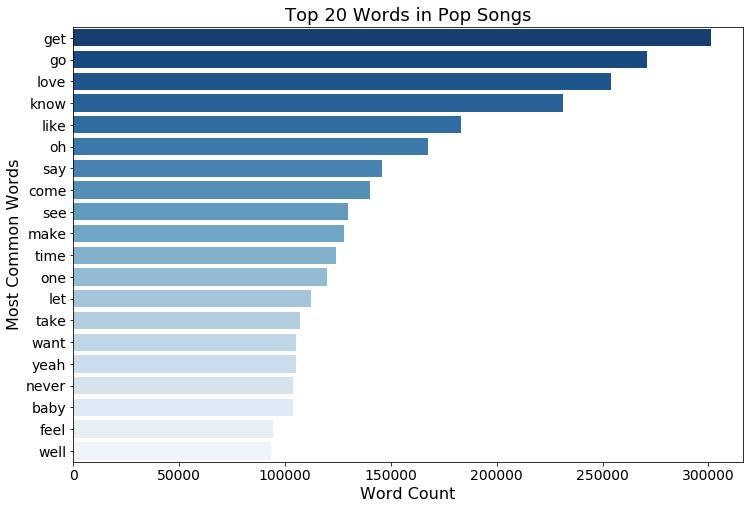

In [16]:
#bar plot for top 20 words in pop
plt.figure(figsize=(12,8))
sns.barplot(unigram_pop['Count'],unigram_pop['Word'],palette='Blues_r')
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.title('Top 20 Words in Pop Songs',fontsize=18)
plt.ylabel('Most Common Words',fontsize=16)
plt.xlabel('Word Count',fontsize=16)
sns.set_style()
plt.show()

In [17]:
# get top words for rap genre
unigram_rap = pd.DataFrame(top_ngrams(rap_df['cleaned_lemmed_lyrics'], 1), columns = ['Word','Count'])

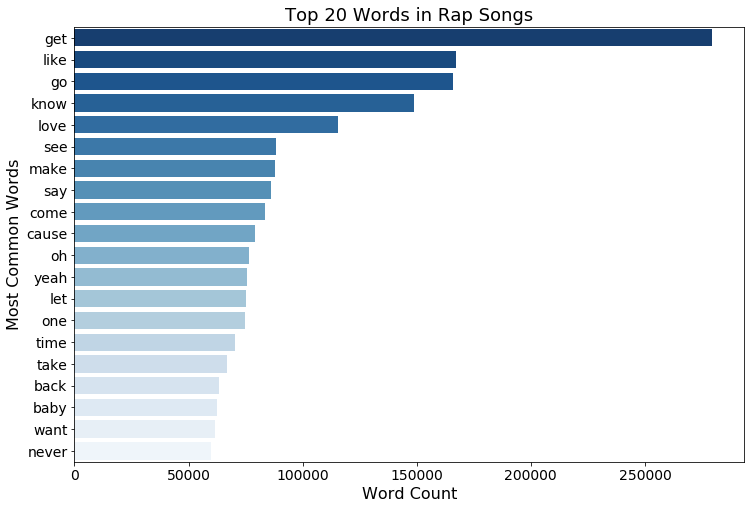

In [18]:
#bar plot for top 20 words in rap
plt.figure(figsize=(12,8))
sns.barplot(unigram_rap['Count'],unigram_rap['Word'],palette='Blues_r')
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.title('Top 20 Words in Rap Songs',fontsize=18)
plt.ylabel('Most Common Words',fontsize=16)
plt.xlabel('Word Count',fontsize=16)
sns.set_style()
plt.show()

In [19]:
# get top words for rock genre
unigram_rock = pd.DataFrame(top_ngrams(rock_df['cleaned_lemmed_lyrics'], 1), columns = ['Word','Count'])

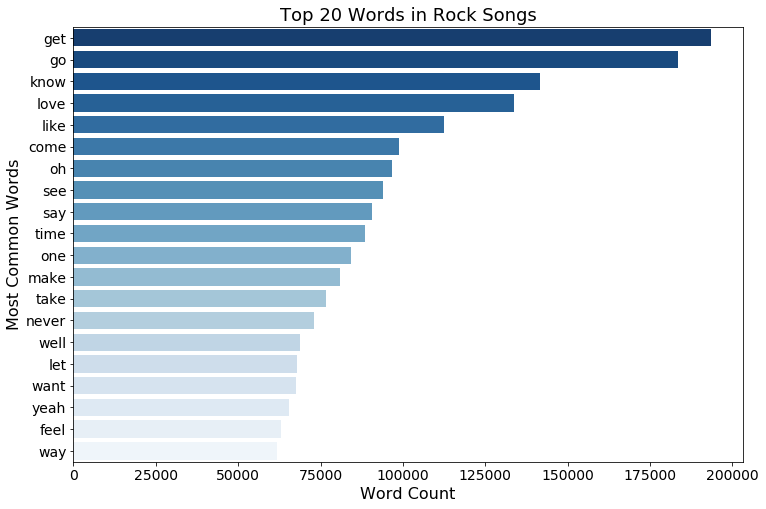

In [20]:
#bar plot for top 20 words in rock
plt.figure(figsize=(12,8))
sns.barplot(unigram_rock['Count'],unigram_rock['Word'],palette='Blues_r')
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.title('Top 20 Words in Rock Songs',fontsize=18)
plt.ylabel('Most Common Words',fontsize=16)
plt.xlabel('Word Count',fontsize=16)
sns.set_style()
plt.show()

In [21]:
# get top words for rock genre
unigram_country = pd.DataFrame(top_ngrams(country_df['cleaned_lemmed_lyrics'], 1), columns = ['Word','Count'])

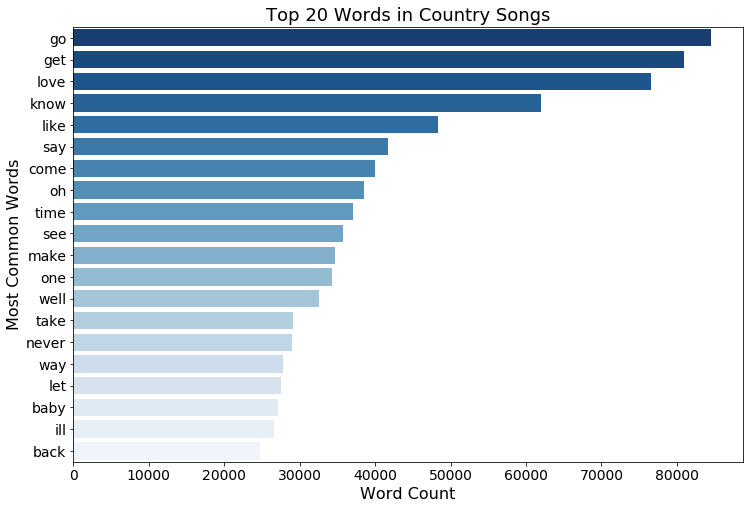

In [22]:
#bar plot for top 20 words in country
plt.figure(figsize=(12,8))
sns.barplot(unigram_country['Count'],unigram_country['Word'],palette='Blues_r')
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.title('Top 20 Words in Country Songs',fontsize=18)
plt.ylabel('Most Common Words',fontsize=16)
plt.xlabel('Word Count',fontsize=16)
sns.set_style()
plt.show()

## Bigrams

In [26]:
# get top words for full df
bigram_full = pd.DataFrame(top_ngrams(df['cleaned_lemmed_lyrics'], 2), columns = ['Word','Count'])

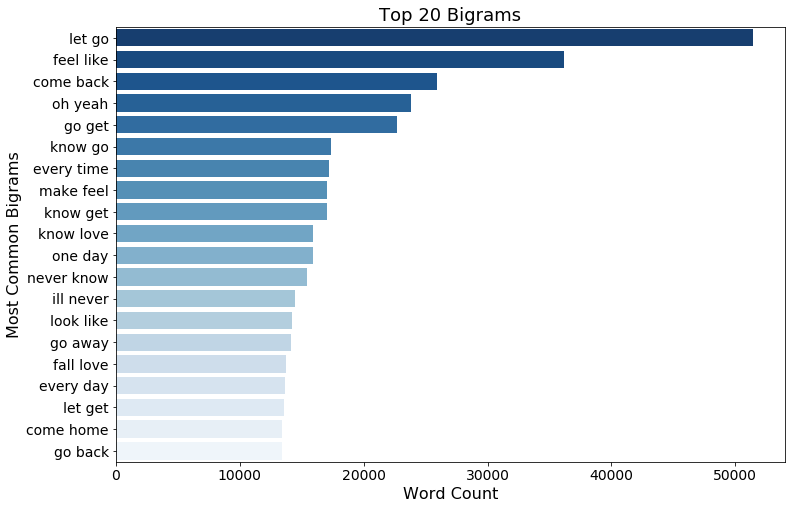

In [27]:
#bar plot for top 20 words
plt.figure(figsize=(12,8))
sns.barplot(bigram_full['Count'],bigram_full['Word'],palette='Blues_r')
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.title('Top 20 Bigrams',fontsize=18)
plt.ylabel('Most Common Bigrams',fontsize=16)
plt.xlabel('Word Count',fontsize=16)
sns.set_style()
plt.show()

In [28]:
# get top bigrams for pop
bigram_pop = pd.DataFrame(top_ngrams(pop_df['cleaned_lemmed_lyrics'], 2), columns = ['Word','Count'])

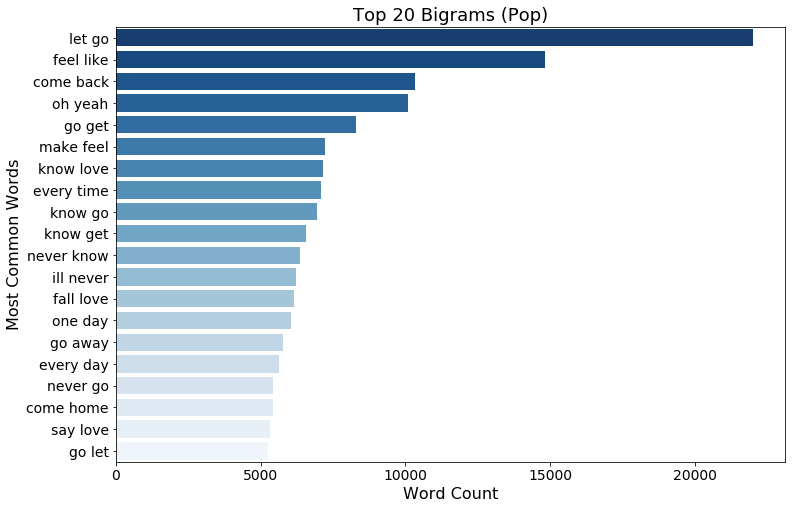

In [29]:
#bar plot for top 20 bigrams (pop)
plt.figure(figsize=(12,8))
sns.barplot(bigram_pop['Count'],bigram_pop['Word'],palette='Blues_r')
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.title('Top 20 Bigrams (Pop)',fontsize=18)
plt.ylabel('Most Common Words',fontsize=16)
plt.xlabel('Word Count',fontsize=16)
sns.set_style()
plt.show()

In [30]:
# get top bigrams for rap
bigram_rap = pd.DataFrame(top_ngrams(rap_df['cleaned_lemmed_lyrics'], 2), columns = ['Word','Count'])

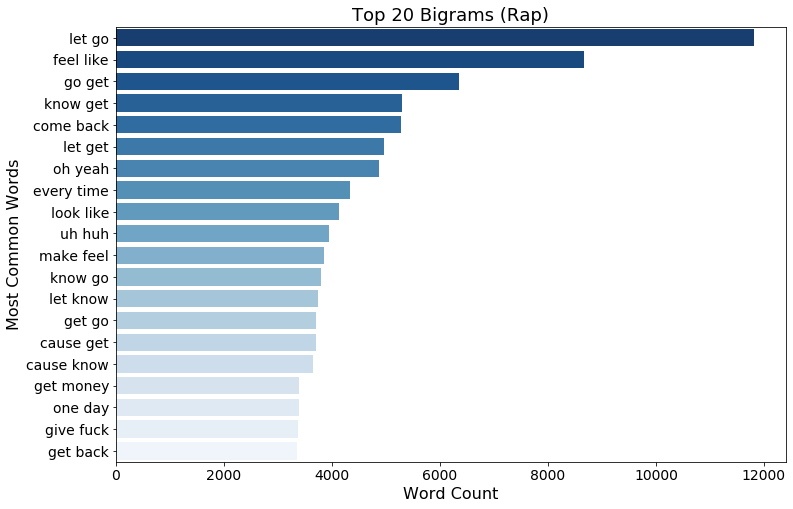

In [31]:
#bar plot for top 20 bigrams (rap)
plt.figure(figsize=(12,8))
sns.barplot(bigram_rap['Count'],bigram_rap['Word'],palette='Blues_r')
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.title('Top 20 Bigrams (Rap)',fontsize=18)
plt.ylabel('Most Common Words',fontsize=16)
plt.xlabel('Word Count',fontsize=16)
sns.set_style()
plt.show()

In [32]:
# get top bigrams for rock
bigram_rock = pd.DataFrame(top_ngrams(rock_df['cleaned_lemmed_lyrics'], 2), columns = ['Word','Count'])

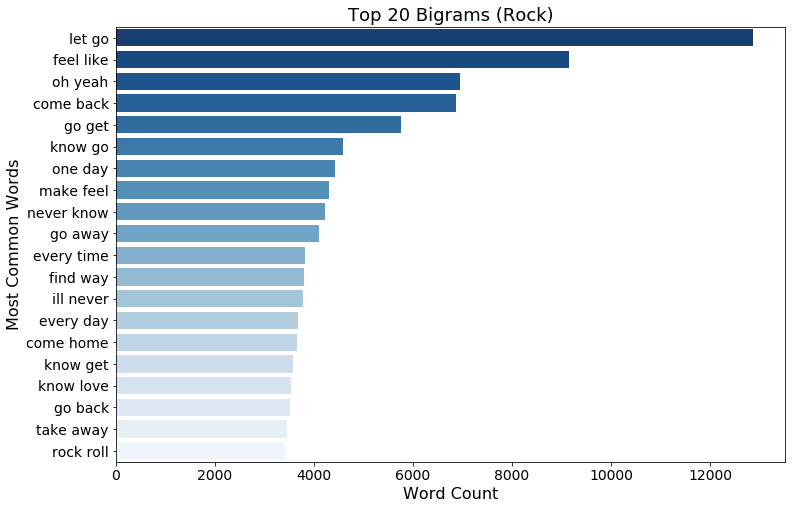

In [33]:
#bar plot for top 20 bigrams (rock)
plt.figure(figsize=(12,8))
sns.barplot(bigram_rock['Count'],bigram_rock['Word'],palette='Blues_r')
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.title('Top 20 Bigrams (Rock)',fontsize=18)
plt.ylabel('Most Common Words',fontsize=16)
plt.xlabel('Word Count',fontsize=16)
sns.set_style()
plt.show()

In [34]:
# get top bigrams for country
bigram_country = pd.DataFrame(top_ngrams(country_df['cleaned_lemmed_lyrics'], 2), columns = ['Word','Count'])

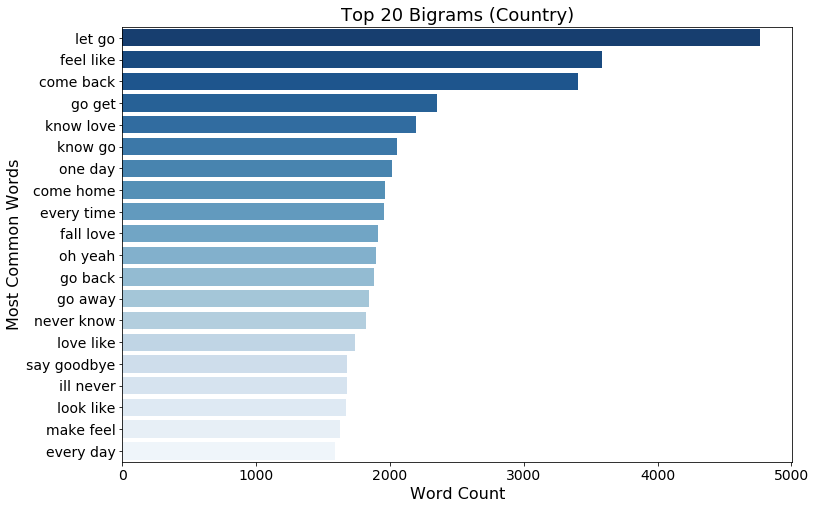

In [35]:
#bar plot for top 20 bigrams (country)
plt.figure(figsize=(12,8))
sns.barplot(bigram_country['Count'],bigram_country['Word'],palette='Blues_r')
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.title('Top 20 Bigrams (Country)',fontsize=18)
plt.ylabel('Most Common Words',fontsize=16)
plt.xlabel('Word Count',fontsize=16)
sns.set_style()
plt.show()

## Trigrams

In [16]:
# get top words for full df
trigram_full = pd.DataFrame(top_ngrams(df['cleaned_lemmed_lyrics'], 3), columns = ['Word','Count'])

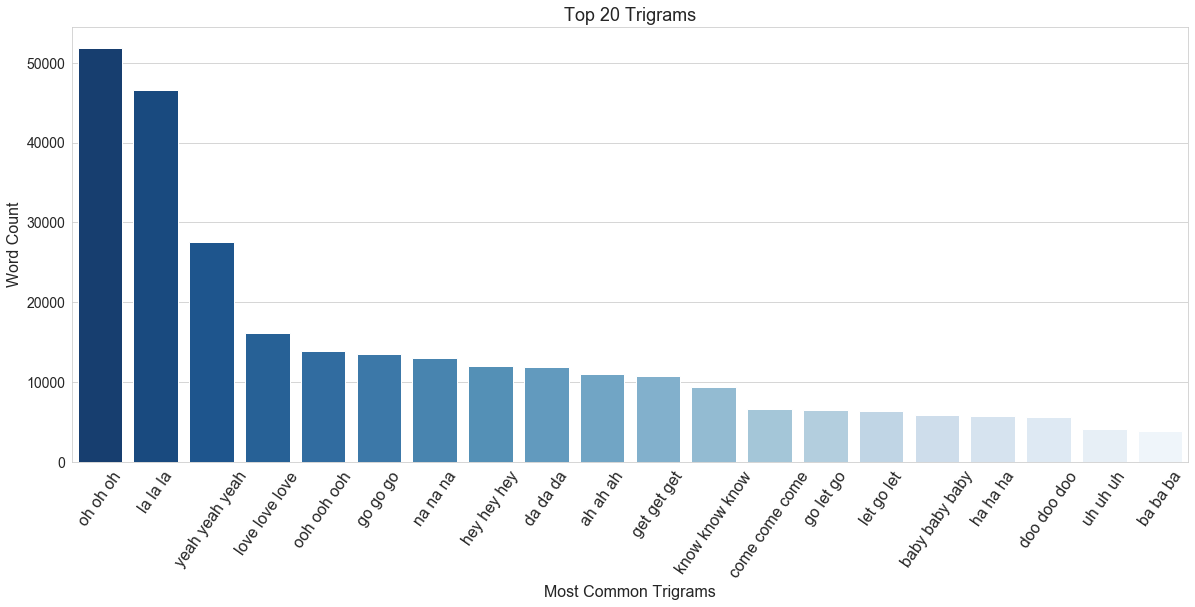

In [17]:
#bar plot for top 20 words
plt.figure(figsize=(20,8))
sns.set_style('whitegrid')
sns.barplot(trigram_full['Word'],trigram_full['Count'],palette='Blues_r')
plt.yticks(fontsize=14)
#plt.xticks(fontsize=14)
plt.title('Top 20 Trigrams',fontsize=18)
plt.xlabel('Most Common Trigrams',fontsize=16)
plt.ylabel('Word Count',fontsize=16)
# obtain x-tick labels and their locations
locs, labels = plt.xticks()
plt.xticks(ticks=locs, labels=labels, rotation=55, fontsize=16)
sns.set_style()
plt.show()

In [38]:
# get top trigrams for full pop
trigram_pop = pd.DataFrame(top_ngrams(pop_df['cleaned_lemmed_lyrics'], 3), columns = ['Word','Count'])

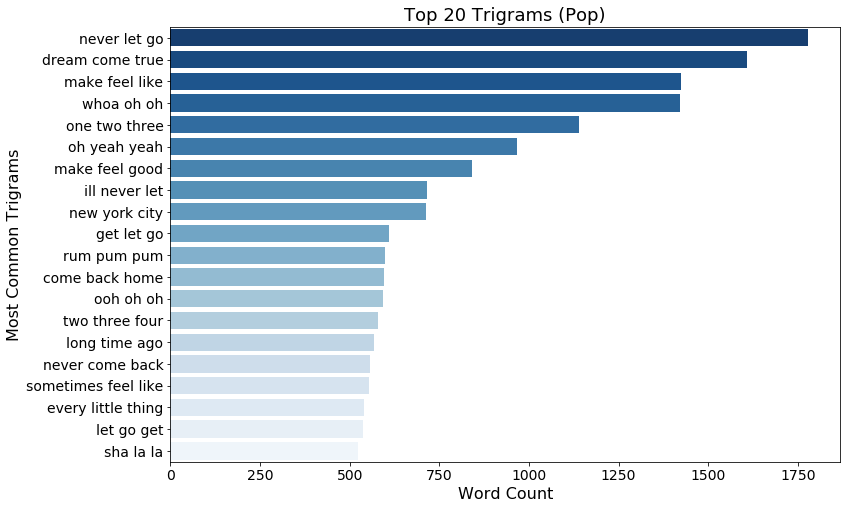

In [39]:
#bar plot for top 20 trigrams (pop)
plt.figure(figsize=(12,8))
sns.barplot(trigram_pop['Count'],trigram_pop['Word'],palette='Blues_r')
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.title('Top 20 Trigrams (Pop)',fontsize=18)
plt.ylabel('Most Common Trigrams',fontsize=16)
plt.xlabel('Word Count',fontsize=16)
sns.set_style()
plt.show()

In [40]:
# get top trigrams for rap
trigram_rap = pd.DataFrame(top_ngrams(rap_df['cleaned_lemmed_lyrics'], 3), columns = ['Word','Count'])

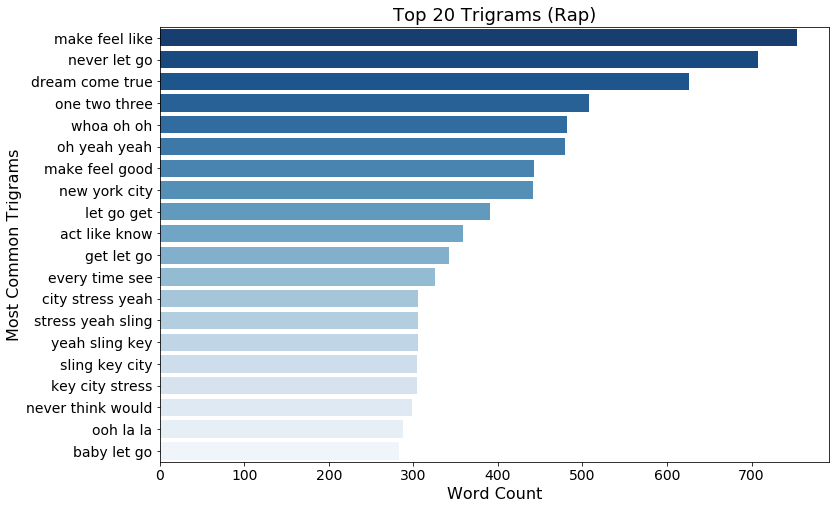

In [41]:
#bar plot for top 20 trigrams (rap)
plt.figure(figsize=(12,8))
sns.barplot(trigram_rap['Count'],trigram_rap['Word'],palette='Blues_r')
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.title('Top 20 Trigrams (Rap)',fontsize=18)
plt.ylabel('Most Common Trigrams',fontsize=16)
plt.xlabel('Word Count',fontsize=16)
sns.set_style()
plt.show()

In [42]:
# get top words for full df
trigram_rock = pd.DataFrame(top_ngrams(rock_df['cleaned_lemmed_lyrics'], 3), columns = ['Word','Count'])

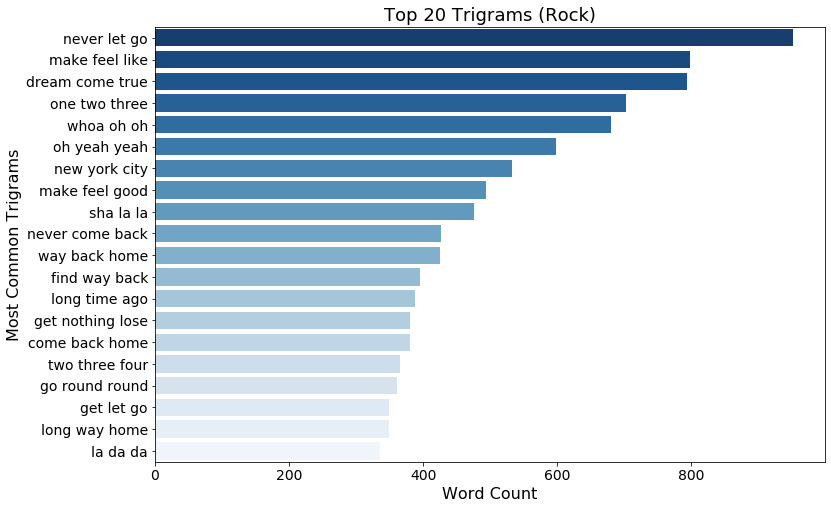

In [43]:
#bar plot for top 20 bigrams (rock)
plt.figure(figsize=(12,8))
sns.barplot(trigram_rock['Count'],trigram_rock['Word'],palette='Blues_r')
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.title('Top 20 Trigrams (Rock)',fontsize=18)
plt.ylabel('Most Common Trigrams',fontsize=16)
plt.xlabel('Word Count',fontsize=16)
sns.set_style()
plt.show()

In [44]:
# get top words for full df
trigram_country = pd.DataFrame(top_ngrams(country_df['cleaned_lemmed_lyrics'], 3), columns = ['Word','Count'])

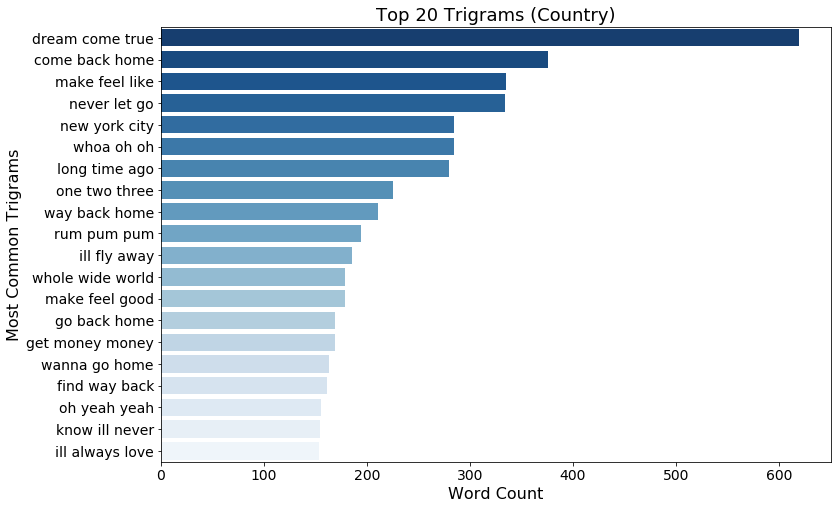

In [45]:
#bar plot for top 20 bigrams (country)
plt.figure(figsize=(12,8))
sns.barplot(trigram_country['Count'],trigram_country['Word'],palette='Blues_r')
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.title('Top 20 Trigrams (Country)',fontsize=18)
plt.ylabel('Most Common Trigrams',fontsize=16)
plt.xlabel('Word Count',fontsize=16)
sns.set_style()
plt.show()

## Baseline

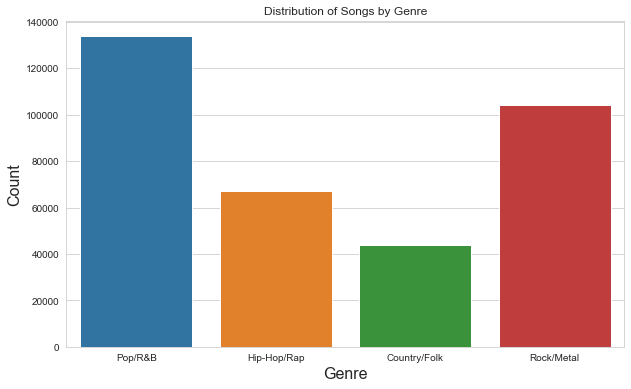

In [21]:
plt.figure(figsize=(10,6))
ax = sns.countplot(x="genre", data=df)
plt.title("Distribution of Songs by Genre")
plt.ylabel('Count',fontsize=16)
plt.xlabel('Genre',fontsize=16)
plt.xticks(np.arange(4), ('Pop/R&B', 'Hip-Hop/Rap', 'Country/Folk', 'Rock/Metal'))
plt.yticks()
plt.show()